In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('ipl/matches.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches[matches['player_of_match'] == 'MS Dhoni'].head()[['team1','team2','winner','player_of_match']]

,team1,team2,winner,player_of_match
24,Sunrisers Hyderabad,Rising Pune Supergiant,Rising Pune Supergiant,MS Dhoni
73,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,MS Dhoni
86,Delhi Daredevils,Chennai Super Kings,Chennai Super Kings,MS Dhoni
143,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,MS Dhoni
181,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,MS Dhoni


In [6]:
pd.value_counts(matches['winner'])

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [7]:
pd.value_counts(matches['player_of_match']).head(10)

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

In [8]:
pd.value_counts(matches['toss_winner'])

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

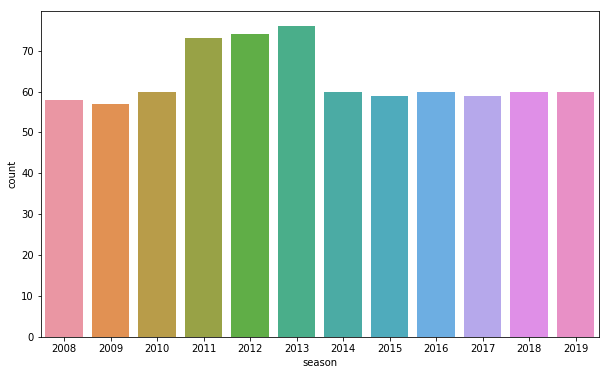

In [9]:
# plt.hist(matches['season'], rwidth=0.9)
plt.figure(figsize=(10,6))
sns.countplot(x=matches['season'], data=matches)

In [10]:
pd.value_counts(matches['season'])

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

In [11]:
deliveries = pd.read_csv('ipl/deliveries.csv')

In [12]:
deliveries.shape

(179078, 21)

In [13]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
pd.value_counts(deliveries[deliveries['batsman_runs'] == 6]['batsman']).head(10)

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
V Kohli           191
DA Warner         181
SR Watson         177
KA Pollard        175
YK Pathan         161
Name: batsman, dtype: int64

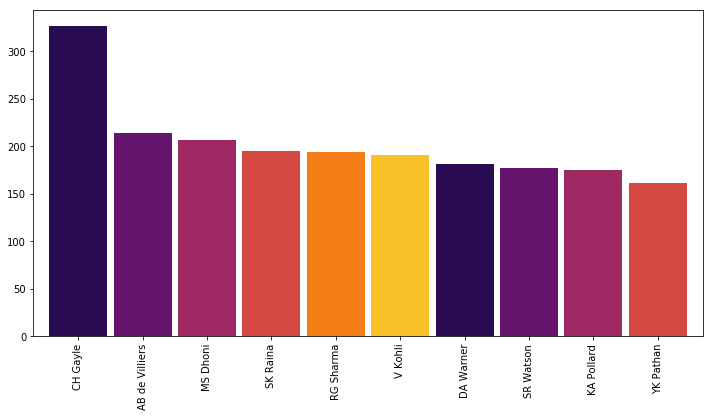

In [15]:
plt.figure(figsize=(12,6))
deliveries[deliveries['batsman_runs'] == 6]['batsman'].value_counts().head(10).plot.bar(width=0.9,color=sns.color_palette('inferno'))

In [16]:
temp_df = deliveries.dropna(subset=['player_dismissed'])

In [17]:
temp_df.shape

(8834, 21)

In [18]:
wicket_df = temp_df[temp_df['dismissal_kind'] != 'run out']

In [19]:
pd.value_counts(wicket_df['bowler']).head(10)

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: bowler, dtype: int64

In [20]:
# most runs in IPL
# highest individual score in ipl
# highest team score in ipl


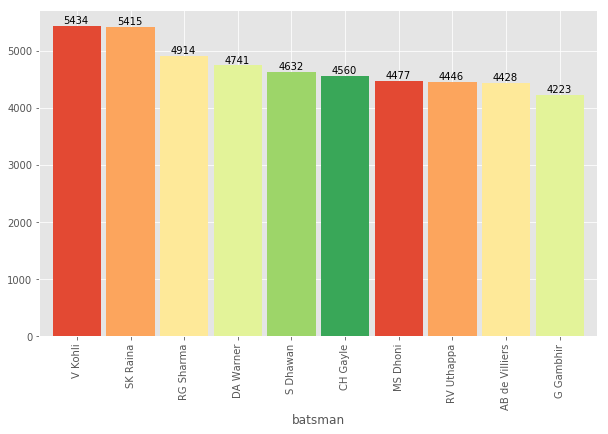

In [45]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
ax = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(width=0.9, color=sns.color_palette('RdYlGn'))
for patch in ax.patches:
    ax.annotate(format(patch.get_height()),(patch.get_x() + 0.2, patch.get_height() + 40))

In [48]:
deliveries.groupby(['batsman','match_id'])['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman         match_id
CH Gayle        411         175
BB McCullum     60          158
AB de Villiers  562         133
RR Pant         7935        130
AB de Villiers  620         129
CH Gayle        372         128
M Vijay         206         127
DA Warner       36          126
V Sehwag        516         122
SR Watson       7953        121
Name: batsman_runs, dtype: int64

In [49]:
deliveries.groupby(['batting_team','match_id'])['total_runs'].sum().sort_values(ascending=False).head(10)

batting_team                 match_id
Royal Challengers Bangalore  411         263
Kolkata Knight Riders        7937        250
Royal Challengers Bangalore  620         248
Chennai Super Kings          206         246
Kolkata Knight Riders        11338       241
Chennai Super Kings          61          240
Royal Challengers Bangalore  562         235
Sunrisers Hyderabad          11147       233
                             11339       232
Kings XI Punjab              296         232
Name: total_runs, dtype: int64

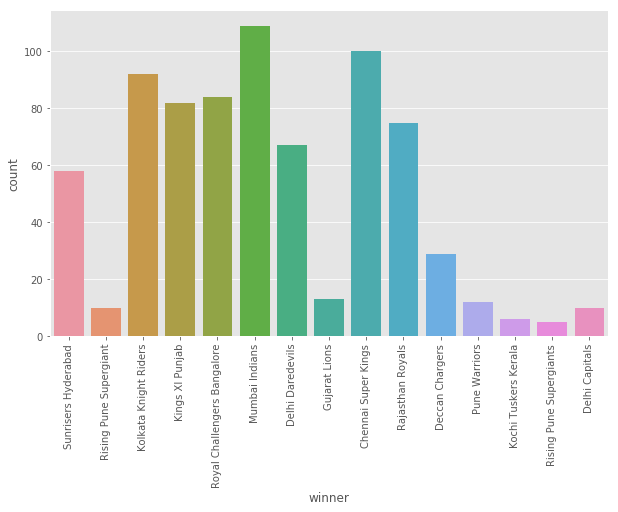

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x='winner',data=matches)
plt.xticks(rotation='vertical')
plt.show()

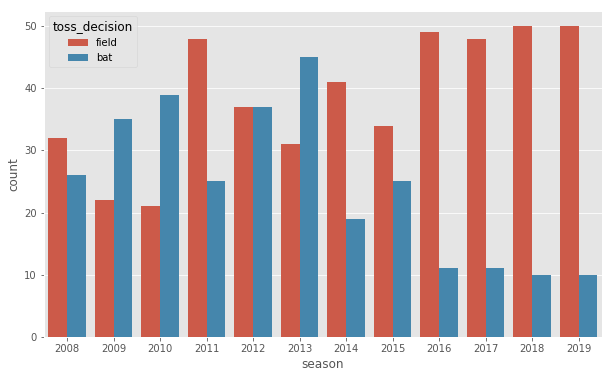

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=matches, hue='toss_decision')
# sns.countplot(x='toss_decision', data=matches, hue='season')